In [1]:
from itertools import permutations as perms
from itertools import product
import numpy as np
import MultiPoint as mp
import propagator
import wignerD as wd

In [2]:
from CORRcalc import *

In [3]:
import imp  # imp.reload(module)
import matplotlib.pyplot as plt
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

## Set of Ks for testing

In [21]:
def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2

    Ks = [k1, k2, k3]
    return Ks

In [22]:
def set4Ks_line(K):
    k1=np.array([0,0,1])*K
    k2=np.array([0,0,1])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

In [23]:
def set4Ks_square(K):
    k1=np.array([0,0,1])*K
    k2=np.array([0,1,0])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

### 1.1 Two point correlations

## 2. Check Leibler's identities

In [ ]:
N=1.0
FA=0.2

nlam=10
pset=propagator.prop_set(nlam=nlam)

K = 10.0
k = set4Ks(K)

print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 0, 0, 0]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 0, 0, 1]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 0, 1, 0]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 1, 0, 0]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[1, 0, 0, 0]))

print(s4wlc(pset, wigset, N, FA, k, sequence=[1, 1, 0, 0]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 0, 1, 1]))

print(s4wlc(pset, wigset, N, FA, k, sequence=[1, 0, 0, 1]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 1, 1, 0]))

print(s4wlc(pset, wigset, N, FA, k, sequence=[1, 0, 1, 0]))
print(s4wlc(pset, wigset, N, FA, k, sequence=[0, 1, 0, 1]))

## 3. Check with rigid rod limits

### 3.1 Pair correlation

In [44]:
FA=1.0
sequence = [0,0]
kL = np.linspace(0,20,100)

# Rigid rod
NRR = 10
KVRR = kL/NRR
r2 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    r2[ind] = r2wlc(NRR, FA, K, sequence=sequence)/(NRR**2)

In [45]:
# Wormlike chain
pset=propagator.prop_set(nlam=1)

N=1.0
KV = kL/N
s2_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2_N1[ind] = s2wlc(pset, N, FA, K, sequence=sequence)/(N**2)
    
N=0.1
KV = kL/N
s2_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    s2_Np1[ind] = s2wlc(pset, N, FA, K, sequence=sequence)/(N**2)

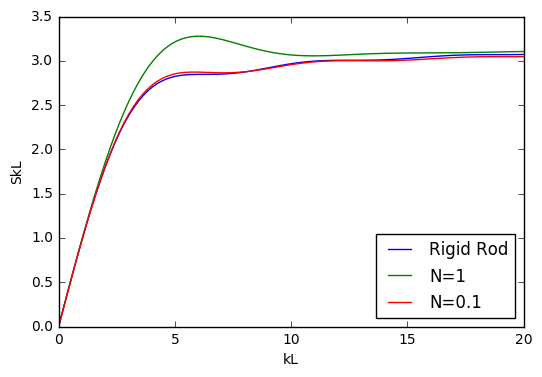

In [47]:
plt.plot(kL, r2.real*kL, label='Rigid Rod')
plt.plot(kL, s2_N1.real*kL, label='N=1')
plt.plot(kL, s2_Np1.real*kL, label='N=0.1')
plt.xlabel('kL')
plt.ylabel('SkL')
plt.legend(loc=4)
# plt.axis([2,20,2,3.5])
plt.show()

### 3.2 Three-point correlations

In [6]:
FA=1.0
sequence = [0,0,0]
kL = np.linspace(0,30,100)

# Rigid rod
NRR = 10
KVRR = kL/NRR
r3 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    Ks = set3Ks(K)
    r3[ind] = r3wlc(NRR, FA, Ks, sequence=sequence)/(NRR**3)

In [7]:
# Wormlike chain
pset=propagator.prop_set(nlam=10)

N=1.0
KV = kL/N
s3_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set3Ks(K)
    s3_N1[ind] = s3wlc(pset, N, FA, Ks, sequence=sequence)/(N**3)

N=0.1
KV = kL/N
s3_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set3Ks(K)
    s3_Np1[ind] = s3wlc(pset, N, FA, Ks, sequence=sequence)/(N**3)

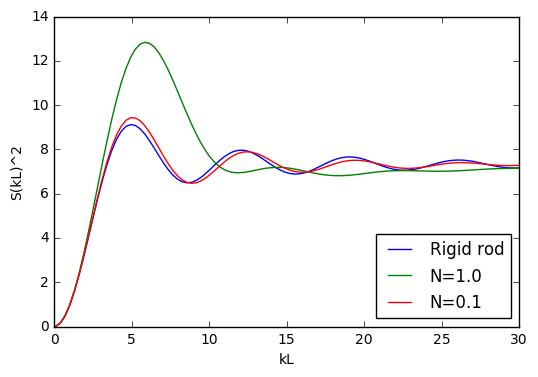

In [43]:
plt.plot(kL, r3.real*kL**2, label='Rigid rod')
plt.plot(kL, s3_N1.real*kL**2, label='N=1.0')
plt.plot(kL, s3_Np1.real*kL**2, label='N=0.1')
plt.legend(loc=4)
plt.xlabel('kL')
plt.ylabel('S(kL)^2')
plt.show()

### 3.3 Four-point correlations

In [25]:
FA=1.0
sequence = [0,0,0,0]
kL = np.linspace(0.1,30,100)

# Rigid rod
NRR = 10
KVRR = kL/NRR
r4 = np.zeros((len(KVRR)),dtype=type(1+1j))
for ind, K in enumerate(KVRR):
    Ks = set4Ks_square(K)
    r4[ind] = r4wlc(NRR, FA, Ks, sequence=sequence)/(NRR**4)

# Wormlike chain
pset=propagator.prop_set(nlam=10)
wigset = wd.wigner_d_vals()

N = 1
KV = kL/N
s4_N1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set4Ks_square(K)
    s4_N1[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=sequence)/(N**4)
    
N = 0.1
KV = kL/N
s4_Np1 = np.zeros((len(KV)),dtype=type(1+1j))
for ind, K in enumerate(KV):
    Ks = set4Ks_square(K)
    s4_Np1[ind] = s4wlc(pset, wigset, N, FA, Ks, sequence=sequence)/(N**4)

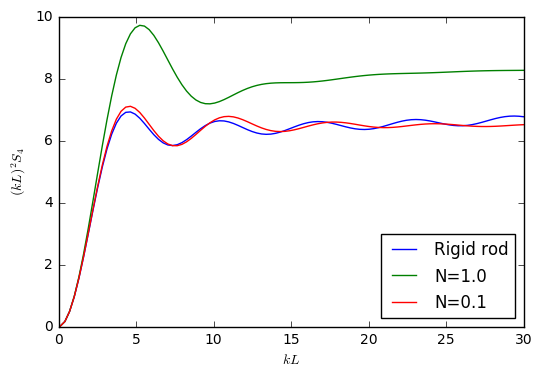

In [35]:
plt.plot(kL, r4.real*kL**2, label='Rigid rod')
plt.plot(kL, s4_N1.real*kL**2, label='N=1.0')
plt.plot(kL, s4_Np1.real*kL**2, label='N=0.1')
plt.legend(loc=4)
plt.xlabel('$kL$')
plt.ylabel('$(kL)^2S_{4}$')
plt.show()

In [ ]:
# import cProfile
# cProfile.run('s4wlc(pset, N, FA, Ks, sequence=sequence)')

In [ ]:
# KV = np.logspace(-1,3,10)
# s4 = np.zeros((2,2,2,2,len(KV)),dtype=type(1+1j))
# for ind, K in enumerate(KV):
#     Ks = setKs(K)
#     s4[:,:,:,:,ind] = s4wlc(pset, N, FA, Ks)/(N**4)

In [ ]:
# plt.loglog(KV, s4[0,0,0,0,:])
# plotlog(1e1, 5e-3, -2, xrange=2)
# plt.show()